In [3]:
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1, cache=True)
x,y=data.data, data.target

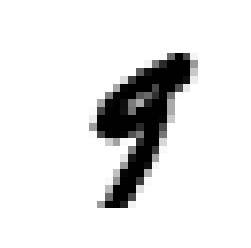

In [28]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
ex = x[36000]
ex1 = ex.reshape(28, 28)
plt.imshow(ex1, cmap = mpl.cm.binary, interpolation="nearest")
#plt.imshow(ex)
plt.axis("off")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

array(['8', '2', '8', '9', '8', '2', '6', '1', '4', '8'], dtype=object)

In [25]:
#binary classifier
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
#print(y_train[:10])
#print(y_train[:10]=='5')
#y_train_5[:10]

In [32]:
from sklearn.linear_model import SGDClassifier
import numpy as np

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(x_train, y_train_5)
y_pred = sgd_clf.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_5, y_pred))

0.9206285714285715


In [52]:
#DJ Classification
#data
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1, cache=True)
x,y=data.data, data.target


#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
#binary classifier
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')


#training
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)),
])
model.fit(x_train, y_train_5)


#test and evaluation
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test_5, y_pred))


#or validation (no model.fit)
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train_5, cv=3, scoring='accuracy')

0.9672571428571428


array([0.97017313, 0.96702857, 0.96799817])

In [49]:
#training
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')



array([0.95651677, 0.96194286, 0.96376936])

In [51]:
#training
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)),
])
model.fit(x_train, y_train_5)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test_5, y_pred))
print(precision_score(y_test_5, y_pred))
print(recall_score(y_test_5, y_pred))
print(f1_score(y_test_5, y_pred))


from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train_5, cv=3, scoring='accuracy')



0.9696571428571429
0.8669590643274854
0.7726384364820847
0.8170857733379264


array([0.96645906, 0.96708571, 0.96691239])

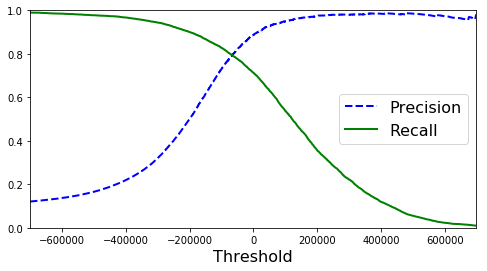

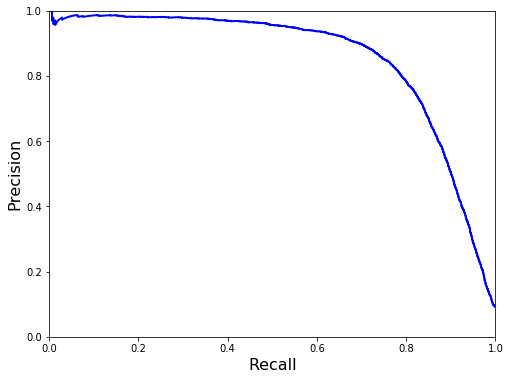

In [14]:
#precision vs recall
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

%matplotlib inline
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(fontsize=16)
#    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [12]:
y_train_pred_90 = (y_scores > 70000)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9375206611570248
0.5985647952722668


In [33]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_train_5, y_train_pred)
a

array([[47330,   432],
       [ 1357,  3381]])

In [36]:
print('precision = TP / (TP + FP) = {}'.format(a[1,1]/np.sum(a[:,1])))
print('recall    = TP / (TP + TN) = {}'.format(a[1,1]/np.sum(a[1,:])))

precision = TP / (TP + FP) = 0.8867033831628639
recall    = TP / (TP + TN) = 0.7135922330097088


In [45]:
#Multiclass Classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.87415024, 0.87330705, 0.875     ])

In [46]:
#Multiclass Classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90956869, 0.91239499, 0.90655007])

In [55]:
#DJ Multiclass Classification
#data
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1, cache=True)
x,y=data.data, data.target


#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

#training and validating
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)),
])
cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy')

#model.fit(x_train, y_train)
#y_pred = model.predict(x_test)
#from sklearn.metrics import accuracy_score 
#print(accuracy_score(y_test, y_pred))

array([0.91041536, 0.91062346, 0.9114756 ])